## Lab 2

In [21]:
!pip install tensorflow -q
!pip install matplotlib -q
!pip install torch -q

In [7]:
!pip install TensorRT -q

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

In [48]:
import re

def remove_roman_numerals(text):
    roman_numerals_pattern = r'\bM{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b'
    #roman_numerals_pattern = r'\bM{0,4}(cm|cd|d?c{0,3})(xc|xl|l?x{0,3})(ix|iv|v?i{0,3})\b'
    return re.sub(roman_numerals_pattern, '', text)

### Data loading: "Евгений Онегин"


In [53]:
#!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]
text = [remove_roman_numerals(x) for x in text]

In [54]:
text

['\n',
 '\n',
 '\n',
 '«Мой дядя самых честных правил,\n',
 'Когда не в шутку занемог,\n',
 'Он уважать себя заставил\n',
 'И лучше выдумать не мог.\n',
 'Его пример другим наука;\n',
 'Но, боже мой, какая скука\n',
 'С больным сидеть и день и ночь,\n',
 'Не отходя ни шагу прочь!\n',
 'Какое низкое коварство\n',
 'Полуживого забавлять,\n',
 'Ему подушки поправлять,\n',
 'Печально подносить лекарство,\n',
 'Вздыхать и думать про себя:\n',
 'Когда же черт возьмет тебя!»\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Так думал молодой повеса,\n',
 'Летя в пыли на почтовых,\n',
 'Всевышней волею Зевеса\n',
 'Наследник всех своих родных. —\n',
 'Друзья Людмилы и Руслана!\n',
 'С героем моего романа\n',
 'Без предисловий, сей же час\n',
 'Позвольте познакомить вас:\n',
 'Онегин, добрый мой приятель,\n',
 'Родился на брегах Невы,\n',
 'Где, может быть, родились вы\n',
 'Или блистали, мой читатель;\n',
 'Там некогда гулял и я:\n',
 'Но вреден север для меня\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Служив о

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [55]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = ' '.join([x.lower() for x in text])
text = text.replace(' \n','').replace('  ', ' ')
#text = text.replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ')


In [57]:
chars_for_removes ='—«»'
translates = str.maketrans('','',chars_for_removes)
text = text.translate(translates)
text

'\n мой дядя самых честных правил,\n когда не в шутку занемог,\n он уважать себя заставил\n и лучше выдумать не мог.\n его пример другим наука;\n но, боже мой, какая скука\n с больным сидеть и день и ночь,\n не отходя ни шагу прочь!\n какое низкое коварство\n полуживого забавлять,\n ему подушки поправлять,\n печально подносить лекарство,\n вздыхать и думать про себя:\n когда же черт возьмет тебя!\n так думал молодой повеса,\n летя в пыли на почтовых,\n всевышней волею зевеса\n наследник всех своих родных. \n друзья людмилы и руслана!\n с героем моего романа\n без предисловий, сей же час\n позвольте познакомить вас:\n онегин, добрый мой приятель,\n родился на брегах невы,\n где, может быть, родились вы\n или блистали, мой читатель;\n там некогда гулял и я:\n но вреден север для меня\n служив отлично-благородно,\n долгами жил его отец,\n давал три бала ежегодно\n и промотался наконец.\n судьба евгения хранила:\n сперва madame за ним ходила,\n потом monsieur ее сменил;\n ребенок был резов

Put all the characters, that you've seen in the text, into variable `tokens`.

In [58]:
tokens = sorted(set(text))
tokens

['\n',
 ' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '5',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '^',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 '–',
 '’',
 '…',
 '€']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [59]:
# dict <index>:<char>
# Your great code here
idx_to_token = {idx: x for idx, x in enumerate(tokens)}
# dict <char>:<index>
# Your great code here
token_to_idx = {x: idx for idx, x in enumerate(tokens)}
print(f'len(idx_to_token): {len(idx_to_token)}, len(token_to_idx): {len(token_to_idx)}')


len(idx_to_token): 79, len(token_to_idx): 79


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [64]:
# Your code here
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Embedding
from tensorflow.keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

In [65]:
# Assuming text is already loaded and preprocessed as in your snippet

# Constants
MAXLEN = 40  # Length of extracted character sequences
STEP = 3  # Step size for moving the reading window

# Prepare the text
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Cut the text in semi-redundant sequences of MAXLEN characters
sentences = []
next_chars = []
for i in range(0, len(text) - MAXLEN, STEP):
    sentences.append(text[i: i + MAXLEN])
    next_chars.append(text[i + MAXLEN])

# One-hot encoding
x = np.zeros((len(sentences), MAXLEN, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = True
    y[i, char_indices[next_chars[i]]] = True

# Build the model: a single LSTM
model = Sequential([
    Input(shape=(MAXLEN, len(chars))), 
    SimpleRNN(128), #input_shape=(MAXLEN, len(chars))),
    Dense(len(chars), activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Helper function to sample an index from a probability array
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Function invoked at end of each epoch to print generated text
def on_epoch_end(epoch, _):
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = np.random.randint(0, len(text) - MAXLEN - 1)
    generated = ''
    sentence = text[start_index: start_index + MAXLEN]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, MAXLEN, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = True

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature=1.0)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [66]:
# Your plot code here
import sys
# Your plot code here
historyRNN = model.fit(x, y, batch_size=256, epochs=5, callbacks=[print_callback])

Epoch 1/5
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.4140
----- Generating text after Epoch: 0
----- Generating with seed: " плеч.
 от хладного разврата света
 еще "
 плеч.
 от хладного разврата света
 еще стов
 ;.ка с ыи ве езрпмю,а кум. :с, естцпдвяен е яхага нинис  пратжй,, репоер [ьйк захеты.л
ытя 
венбы гаслтл носы спнwхруе я
нтвехьин кдлыо номоягт ныют
еоо  о ечти с вере …оикажосшпоя иьквои и оотяи жд,не
 ласекм
 кодьжиа т
и ?нзрь.
е
тс 7одоуеtсно нг  слзелекь бтан
 веа–
вн   алемьпзло вдо,пенаны д мнтг,и о оррр,ж й яд га в
тнт прзкрьтду
 .ньи?
ьвунз заюи,  таро, …овв отой.к ка,ж
 ню нтна,
 ср
187/187 ━━━━━━━━━━━━━━━━━━━━ 31s 159ms/step - loss: 3.4111
Epoch 2/5
186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.7835
----- Generating text after Epoch: 1
----- Generating with seed: "з больших сует:
 желудок – верный наш бр"
з больших сует:
 желудок – верный наш бре
 ныо ку порнз сремдыая,
 ихнксб ирчд г ливесе веме усже[
 е пожодо,
 бндок дебпугоа, ониньейдноаным ветжнай 

Plot the loss function (axis X: number of epochs, axis Y: loss function).

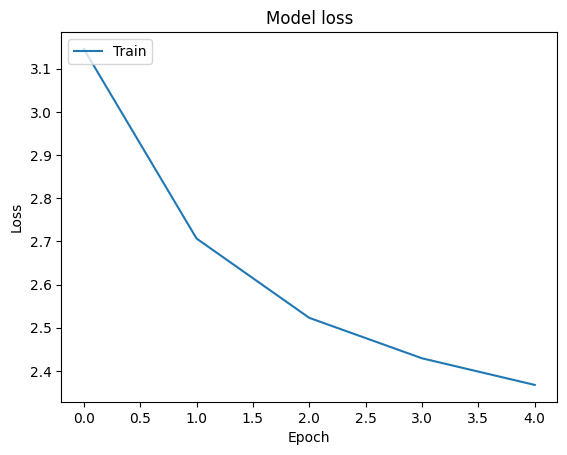

In [67]:
# Plotting the loss
plt.plot(historyRNN.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [27]:
import torch
import torch.nn.functional as F
import numpy as np

In [28]:
def generate_text(model, char_to_index, indices_char, seed_phrase="Hello", length=500, temperature=0.2):
    """
    Generate text using a trained RNN model.

    :param model: Trained Keras model
    :param char_to_index: Dictionary mapping characters to their indices
    :param indices_char: Dictionary mapping indices to their characters
    :param seed_phrase: Initial phrase to start text generation
    :param length: Total length of the text to generate
    :param temperature: Sampling temperature
    """
    seed_phrase = seed_phrase.lower()
    seed_length = len(seed_phrase)
    if seed_length < MAXLEN:
        # Pad the seed_phrase if it's too short
        seed_phrase = seed_phrase.rjust(MAXLEN)
    elif seed_length > MAXLEN:
        # Truncate the seed_phrase if it's too long
        seed_phrase = seed_phrase[:MAXLEN]
    # Prepare the seed phrase as the initial input to the model
    generated = seed_phrase.lower()
    sentence = seed_phrase.lower()

    # Generate the text
    for i in range(length - len(seed_phrase)):
        # Prepare the input tensor
        x_pred = np.zeros((1, len(sentence), len(char_to_index)), dtype=np.bool_)
        for t, char in enumerate(sentence):
            x_pred[0, t, char_to_index[char]] = True

        # Make a prediction (output is logits, not probabilities)
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = indices_char[next_index]

        # Append the new character and shift the sentence to include it
        generated += next_char
        sentence = sentence[1:] + next_char

        # Reset the sentence if it gets too long to process (optional)
        if len(sentence) > MAXLEN:
            sentence = sentence[-MAXLEN:]

    return generated

def sample(preds, temperature=1.0):
    """ Helper function to sample an index from a probability array """
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-7) / temperature  # avoid log(0) error
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))
generated_text = generate_text(model, char_indices, indices_char, seed_phrase="дядя с честными правилами", length=500, temperature=0.2)
print(generated_text)

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [30]:
# Your beautiful code here
from tensorflow.keras.layers import LSTM
# Your beautiful code here
# Build the model: a single LSTM
modelLSTM = Sequential([
    Input(shape=(MAXLEN, len(chars))), 
    LSTM(128), # input_shape=(MAXLEN, len(chars))),
    Dense(len(chars), activation='softmax'),
])

modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam')

/home/gitpod/.pyenv/versions/3.12.3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
historyLSTM = modelLSTM.fit(x, y, batch_size=128, epochs=5, callbacks=[print_callback])

Epoch 1/20
128/370 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - loss: 2.0609

In [ ]:
# Plotting the loss
plt.plot(historyLSTM.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
# Plotting the loss
plt.plot(historyRNN.history['loss'], historyLSTM.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [47]:
# Text generation with different temperature values here
phrase = "дядя с честными правилами"
for temp in [0.1, 0.2, 0.5, 1.0, 1.2]:
  print(f"Temperature: {temp}")
  print('vanilla RNN: ',generate_text(model, char_indices, indices_char, seed_phrase=phrase, length=500, temperature=temp))
  print('LSTM: ', generate_text(modelLSTM, char_indices, indices_char, seed_phrase=phrase, length=500, temperature=temp))


### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [4]:
# Saving and loading code here
modelPrefix = 'Pushkin_EOnegin'
modelType = ['_vanilla_RNN.h5', '_sonnets_LSTM.h5']
model.save(modelPrefix + modelType[0])
modelLSTM.save(modelPrefix + modelType[1])

In [ ]:
from tensorflow.keras.models import load_model

# Load models
loaded_vanilla_rnn = load_model(modelPrefix + modelType[0])
loaded_lstm = load_model(modelPrefix + modelType[1])

In [ ]:
phrase1 = 'уж солнце над ручьем вставало'
print('vanilla RNN: ',generate_text(loaded_vanilla_rnn, char_indices, indices_char, seed_phrase=phrase1, length=500, temperature=0.2))
print('LSTM: ', generate_text(loaded_lstm, char_indices, indices_char, seed_phrase=phrase1, length=500, temperature=0.2))

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)